#Código Vigas PEII
##### Andrés Felipe Contreras, Melany Daza, Katherin Nohava

In [3]:
#!pip install sv-ttk
#!pip install matplotlib
#!pip install sympy
import matplotlib.pyplot as plt 
import numpy as np 
import sympy as sp
import tkinter as tk
from Funciones import *
from tkinter import ttk
import sv_ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg as plot_widget
import math


###Interface

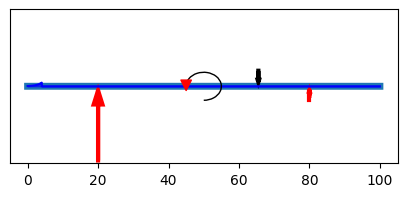

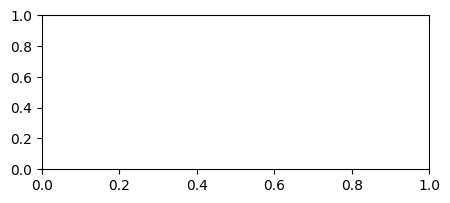

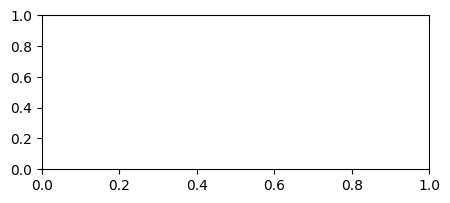

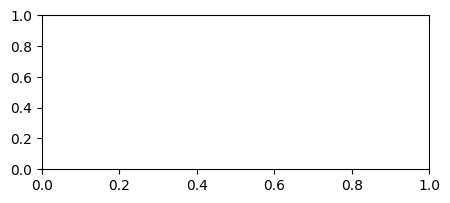

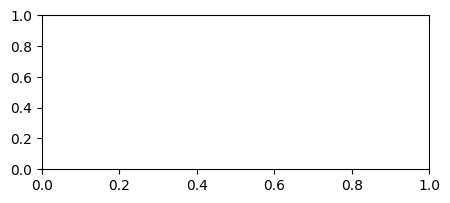

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\andre\AppData\Local\Temp\ipykernel_31016\3506825736.py", line 267, in <lambda>
    calcular = ttk.Button(ui, text="Calcular", command=lambda: calculate_beam(beamgraph,figbeam,sheargraph,figshear,momentgraph,
                                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\iCloudDrive\Uni\Tercero\Proyecto\Codigo_vigas\Funciones.py", line 422, in calculate_beam
    Factor_o_falla = von_mises_stress()
                     ^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\iCloudDrive\Uni\Tercero\Proyecto\Codigo_vigas\Funciones.py", line 386, in von_mises_stress
    tau_xy1 = beam[4][max_moment_pos]*Q/(I*t)
              ~~~~~

In [4]:
ui = tk.Tk()
ui.title("Análisis de vigas")
ui.geometry("1600x850")
sv_ttk.set_theme("Light")

vcmd = (ui.register(validate_numeric_input), '%d', '%P')
vcmd2 = (ui.register(validate_numeric_input_more_decimals), '%d', '%P')


title1 = ttk.Label(ui, text="Propiedades de la viga", font=("Arial", 16, 'bold'))
title1.place(x=50, y=20)   

#Tamaño

title_tamaño = ttk.Label(ui, text="Tamaño de la viga (m)", font=("Arial", 12))
title_tamaño.place(x=10, y=60)  

tam = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd) 
tam.place(x=10, y=80)

tambutton = ttk.Button(ui, text="Aceptar", command=lambda: update_build(tam, valor_tamaño))
tambutton.place(x=100, y=80)

#Tipo

title_tipo = ttk.Label(ui, text="Tipo de viga", font=("Arial", 12))
title_tipo.place(x=10, y=120)

elegir_tipo = ttk.Combobox(ui, width=4, values=["Cantilever", "Apoyada"])
elegir_tipo.place(x=10, y=140)

tipobutton = ttk.Button(ui, text="Aceptar", command=lambda: update_disable(elegir_tipo, valor_tipo,elegir_tipo,apoyo1,apoyo2,apo1button,apo2button))
tipobutton.place(x=100, y=140)

#Apoyos

title_apoyos = ttk.Label(ui, text="Posición de los apoyos", font=("Arial", 12))
title_apoyos.place(x=10, y=180)

text_apoyo1 = ttk.Label(ui, text="Apoyo 1", font=("Arial", 10))
text_apoyo1.place(x=30, y=200)

apoyo1 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo1.place(x=10, y=220)

apo1button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo1, valor_apoyo1,1))
apo1button.place(x=100, y=220)

text_apoyo2 = ttk.Label(ui, text="Apoyo 2", font=("Arial", 10))
text_apoyo2.place(x=30, y=260)

apoyo2 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo2.place(x=10, y=280)

apo2button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo2, valor_apoyo2,2))
apo2button.place(x=100, y=280)

#Titulo cargas y momentos

title_cargas_momentos = ttk.Label(ui, text="Cargas y momentos", font=("Arial", 16, 'bold'))
title_cargas_momentos.place(x=50, y=370)   

#Cargas puntuales

title_cargas = ttk.Label(ui, text="Cargas puntuales", font=("Arial", 12))
title_cargas.place(x=10, y=400)

text_poscarga = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_poscarga.place(x=30, y=420)

cargapuntualpos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
cargapuntualpos.place(x=10, y=440)

text_magnitud = ttk.Label(ui, text="Magnitud (N)", font=("Arial", 10))
text_magnitud.place(x=115, y=420)

cargapuntualmag = ttk.Entry(ui, width=8, textvariable=tk.IntVar())
cargapuntualmag.place(x=100, y=440)

tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_load(cargapuntualpos, cargapuntualmag, cargas))
tipobutton.place(x=190, y=440)

#Momentos puntuales

title_momentos = ttk.Label(ui, text="Momentos puntuales", font=("Arial", 12))
title_momentos.place(x=10, y=480)

text_posmomento = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_posmomento.place(x=30, y=500)

momentopos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentopos.place(x=10, y=520)

text_magnitud = ttk.Label(ui, text="Magnitud (Nm)", font=("Arial", 10))
text_magnitud.place(x=115, y=500)

momentomag = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentomag.place(x=100, y=520)

tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_moment(momentopos, momentomag, cargas))
tipobutton.place(x=190, y=520)

#Cargas distribuidas

title_distribuidas = ttk.Label(ui, text="Cargas distribuidas", font=("Arial", 12))
title_distribuidas.place(x=10, y=560)

text_expression = ttk.Label(ui, text="Expresión matématica (en terminos de x)", font=("Arial", 10))
text_expression.place(x=30, y=580)

load_expression = ttk.Entry(ui, width=30, textvariable=tk.IntVar())
load_expression.place(x=10, y=600)

text_pos_ini = ttk.Label(ui, text="Inicio (m)", font=("Arial", 10))
text_pos_ini.place(x=30, y=640)

dist_ini = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
dist_ini.place(x=10, y=660)

text_pos_fin = ttk.Label(ui, text="Fin (m)", font=("Arial", 10))
text_pos_fin.place(x=115, y=640)

dist_fin = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
dist_fin.place(x=100, y=660)

distbutton = ttk.Button(ui, text="Agregar", command=lambda: distributed_load(dist_ini, dist_fin, load_expression, cargas))
distbutton.place(x=190, y=660)

# Módulo de Young

text_youngs_modulus = ttk.Label(ui, text="Módulo de Young (Pa)", font=("Arial", 12))
text_youngs_modulus.place(x=200, y=60)

youngs_modulus = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
youngs_modulus.place(x=200, y=80)

youngs_modulus_button = ttk.Button(ui, text="Agregar", command=lambda: add_youngs_modulus(youngs_modulus))
youngs_modulus_button.place(x=380, y=80)

# Momento de inercia
text_moment_of_inertia = ttk.Label(ui, text="Momento de Inercia (m^4)", font=("Arial", 12))
text_moment_of_inertia.place(x=200, y=120)

moment_of_inertia = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
moment_of_inertia.place(x=200, y=140)

moment_of_inertia_button = ttk.Button(ui, text="Agregar", command=lambda: add_inertia(moment_of_inertia))
moment_of_inertia_button.place(x=380, y=140)

# Sección Transversal
text_section_title = ttk.Label(ui, text="Sección Transversal", font=("Arial", 12))
text_section_title.place(x=200, y=180)

# Distancia al eje neutro
text_neutral_axis_distance = ttk.Label(ui, text="Distancia al eje neutro (m)", font=("Arial", 10))
text_neutral_axis_distance.place(x=200, y=200)

neutral_axis_distance = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
neutral_axis_distance.place(x=200, y=220)

neutral_axis_distance_button = ttk.Button(ui, text="Aceptar", command=lambda: add_neutral_axis_distance(neutral_axis_distance))
neutral_axis_distance_button.place(x=380, y=220)

# Primer momento de área
text_first_moment_area = ttk.Label(ui, text="Primer momento de área (m^3)", font=("Arial", 10))
text_first_moment_area.place(x=200, y=255)

first_moment_area = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
first_moment_area.place(x=200, y=275)

first_moment_area_button = ttk.Button(ui, text="Aceptar", command=lambda: add_first_moment_area(first_moment_area))
first_moment_area_button.place(x=380, y=275)

# Espesor
text_thickness = ttk.Label(ui, text="Espesor (m)", font=("Arial", 10))
text_thickness.place(x=200, y=310)

thickness = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
thickness.place(x=200, y=330)

thickness_button = ttk.Button(ui, text="Aceptar", command=lambda: add_thickness(thickness))
thickness_button.place(x=380, y=330)

# Sy
text_sy = ttk.Label(ui, text="Sy (Pa)", font=("Arial", 10))
text_sy.place(x=10, y=310)

sy_entry = ttk.Entry(ui, width=8, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
sy_entry.place(x=10, y=330)

sy_button = ttk.Button(ui, text="Aceptar", command=lambda: add_yield_strength(sy_entry))
sy_button.place(x=100, y=330)


#Datos

scrollbar = tk.Scrollbar(ui)
scrollbar.place(x=575, y=400, height=300)

cargas = tk.Listbox(ui, yscrollcommand=scrollbar.set, font=("Arial", 12))
cargas.place(x=275, y=400, width=300, height=300)
scrollbar.config(command=cargas.yview)

tamaño = ttk.Label(ui, text= "Longitud (m): ", font=("Arial", 12))
tamaño.place(x=500, y=40)

valor_tamaño = ttk.Label(ui, text= "", font=("Arial", 12))
valor_tamaño.place(x=600, y=40)

tipo = ttk.Label(ui, text= "Tipo de viga: ", font=("Arial", 12))
tipo.place(x=500, y=60)

valor_tipo = ttk.Label(ui, text= "", font=("Arial", 12))
valor_tipo.place(x=600, y=60)

pos_apoyo1 = ttk.Label(ui, text= "Apoyo 1: ", font=("Arial", 12))
pos_apoyo1.place(x=500, y=80)

valor_apoyo1 = ttk.Label(ui, text= "", font=("Arial", 12))
valor_apoyo1.place(x=600, y=80)

pos_apoyo2 = ttk.Label(ui, text= "Apoyo 2: ", font=("Arial", 12))
pos_apoyo2.place(x=500, y=100)

valor_apoyo2 = ttk.Label(ui, text= "", font=("Arial", 12))
valor_apoyo2.place(x=600, y=100)

#Gráficas

#Dibujo

figbeam, ax = plt.subplots(figsize=(5, 2))

beamgraph = plot_widget(figbeam, master=ui)
beamgraph.get_tk_widget().place(x=850, y=20)

#Cortantes

figshear, ax = plt.subplots(figsize=(5, 2))

sheargraph = plot_widget(figshear, master=ui)
sheargraph.get_tk_widget().place(x=600, y=300)

#Momentos

figmoment, ax = plt.subplots(figsize=(5, 2))

momentgraph = plot_widget(figmoment, master=ui)
momentgraph.get_tk_widget().place(x=600, y=580)

#Pendientes

figslope, ax = plt.subplots(figsize=(5, 2))

slopegraph = plot_widget(figslope, master=ui)
slopegraph.get_tk_widget().place(x=1100, y=300)

#Deflexiones

figdeflection, ax = plt.subplots(figsize=(5, 2))

deflectiongraph = plot_widget(figdeflection, master=ui)
deflectiongraph.get_tk_widget().place(x=1100, y=580)    

#Calcular 

calcular = ttk.Button(ui, text="Calcular", command=lambda: calculate_beam(beamgraph,figbeam,sheargraph,figshear,momentgraph,
figmoment,slopegraph,figslope,deflectiongraph,figdeflection, resultados))
calcular.place(x=10, y=800)


#Reset

entries = [tam, elegir_tipo, apoyo1, apoyo2, cargapuntualpos, cargapuntualmag, momentopos,
 momentomag, load_expression, dist_ini, dist_fin, youngs_modulus, moment_of_inertia, neutral_axis_distance,
 first_moment_area, thickness, sy_entry]
figures = [figbeam, figshear, figmoment, figslope, figdeflection]
reset = ttk.Button(ui, text="Reset", command=lambda: reset_all(entries,figures))
reset.place(x=100, y=800)

#Resultados

resultados = ttk.Label(ui, text="", font=("Arial", 16, 'bold'))
resultados.place(x=10, y=750)

ui.mainloop()
